<a href="https://colab.research.google.com/github/Sandeepungarala/INSE-6220-PROJECT/blob/main/Multi-class%20Classification%20with%20PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

### Install Pycaret

In [1]:
# Install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 33.3 MB/s 
     |████████████████████████████████| 16.5 MB 54.7 MB/s 
     |████████████████████████████████| 1.3 MB 79.7 MB/s 
     |████████████████████████████████| 325 kB 77.5 MB/s 
     |████████████████████████████████| 6.8 MB 69.0 MB/s 
     |████████████████████████████████| 147 kB 68.3 MB/s 
     |████████████████████████████████| 1.7 MB 12.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 55.1 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 5.0 MB 67.1 MB/s 
     |████████████████████████████████| 662 kB 65.5 MB/s 
     |████████████████████████████████| 167 kB 80.8 MB/s 
     |███████████████████████████████

In [2]:
# Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## Import Libraries

In [3]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,5)

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults
sns.set_theme(style="darkgrid")


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


## Dataset

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [5]:
# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Sandeepungarala/INSE-6220-PROJECT/main/admission%201.csv')
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         337          118                  4  4.5   4.5  9.65   
1         324          107                  4  4.0   4.5  8.87   
2         316          104                  3  3.0   3.5  8.00   
3         322          110                  3  3.5   2.5  8.67   
4         314          103                  2  2.0   3.0  8.21   
5         330          115                  5  4.5   3.0  9.34   
6         321          109                  3  3.0   4.0  8.20   
7         308          101                  2  3.0   4.0  7.90   
8         302          102                  1  2.0   1.5  8.00   
9         323          108                  3  3.5   3.0  8.60   
10        325          106                  3  3.5   4.0  8.40   
11        327          111                  4  4.0   4.5  9.00   
12        328          112                  4  4.0   4.5  9.10   
13        307          109                  3  4.0   3.0  8.00   
14        311          104                  3  3.5   2.0  8.20   
15        314          105                  3  3.5   2.5  8.30   
16        317          107                  3  4.0   3.0  8.70   
17        319          106                  3  4.0   3.0  8.00   
18        318          110                  3  4.0   3.0  8.80   
19        303          102                  3  3.5   3.0  8.50   
20        312          107                  3  3.0   2.0  7.90   
21        325          114                  4  3.0   2.0  8.40   
22        328          116                  5  5.0   5.0  9.50   
23        334          119                  5  5.0   4.5  9.70   
24        336          119                  5  4.0   3.5  9.80   

    Chance of Admit   Class  
0               0.92      1  
1               0.76      1  
2               0.72      1  
3               0.80      1  
4               0.65      0  
5               0.90      1  
6               0.75      1  
7               0.68      0  
8               0.50      0  
9               0.45      0  
10              0.52      1  
11              0.84      1  
12              0.78      1  
13              0.62      1  
14              0.61      1  
15              0.54      0  
16              0.66      0  
17              0.65      1  
18              0.63      0  
19              0.62      0  
20              0.64      1  
21              0.70      0  
22              0.94      1  
23              0.95      1  
24              0.97      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          299 non-null    int64  
 1   TOEFL Score        299 non-null    int64  
 2   University Rating  299 non-null    int64  
 3   SOP                299 non-null    float64
 4   LOR                299 non-null    float64
 5   CGPA               299 non-null    float64
 6   Chance of Admit    299 non-null    float64
 7   Class              299 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 18.8 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## Exploratory Data Analysis

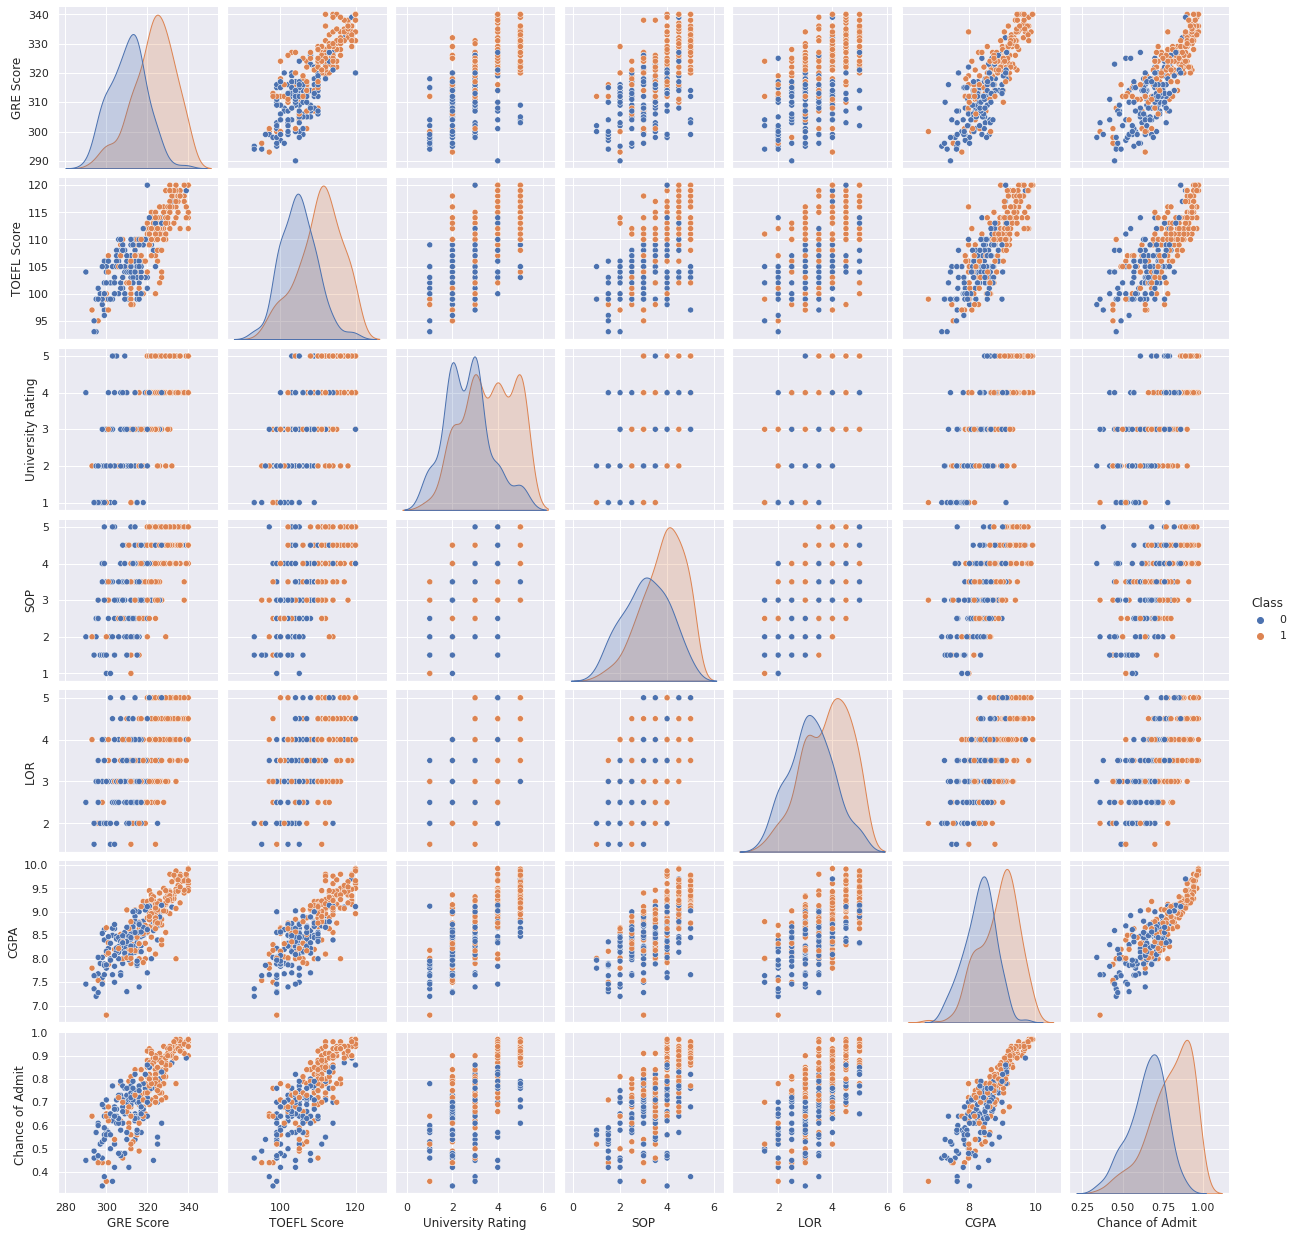

In [10]:
sns.pairplot(df, hue='Class')
plt.show()

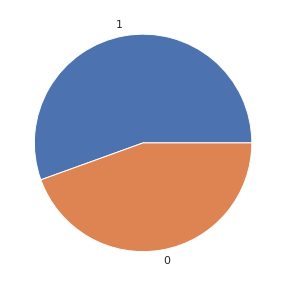

In [12]:
y = df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### Data Matrix

In [13]:
X = df.drop(columns=['Class'])
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        337          118                  4  4.5   4.5  9.65   
1        324          107                  4  4.0   4.5  8.87   
2        316          104                  3  3.0   3.5  8.00   
3        322          110                  3  3.5   2.5  8.67   
4        314          103                  2  2.0   3.0  8.21   
5        330          115                  5  4.5   3.0  9.34   
6        321          109                  3  3.0   4.0  8.20   
7        308          101                  2  3.0   4.0  7.90   
8        302          102                  1  2.0   1.5  8.00   
9        323          108                  3  3.5   3.0  8.60   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
5              0.90  
6              0.75  
7              0.68  
8              0.50  
9              0.45

In [14]:
X.describe().transpose()

count        mean        std     min     25%     50%  \
GRE Score          299.0  317.478261  11.433292  290.00  310.00  317.00   
TOEFL Score        299.0  107.956522   6.093906   93.00  104.00  108.00   
University Rating  299.0    3.193980   1.165426    1.00    2.00    3.00   
SOP                299.0    3.513378   0.992330    1.00    3.00    3.50   
LOR                299.0    3.540134   0.890891    1.50    3.00    3.50   
CGPA               299.0    8.645920   0.593317    6.80    8.22    8.65   
Chance of Admit    299.0    0.731237   0.143717    0.34    0.64    0.73   

                      75%     max  
GRE Score          326.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.50    5.00  
LOR                  4.00    5.00  
CGPA                 9.10    9.92  
Chance of Admit      0.85    0.97

### Standardize the Data

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns

X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.710309     1.650881           0.692769  0.995914  1.079230  1.695153   
1   0.571373    -0.157227           0.692769  0.491205  1.079230  0.378307   
2  -0.129511    -0.650347          -0.166724 -0.518213 -0.045125 -1.090483   
3   0.396152     0.335894          -0.166724 -0.013504 -1.169479  0.040654   
4  -0.304732    -0.814721          -1.026218 -1.527631 -0.607302 -0.735948   
5   1.097036     1.157761           1.552263  0.995914 -0.607302  1.171791   
6   0.308541     0.171520          -0.166724 -0.518213  0.517053 -0.752830   
7  -0.830395    -1.143468          -1.026218 -0.518213  0.517053 -1.259309   
8  -1.356058    -0.979094          -1.885712 -1.527631 -2.293833 -1.090483   
9   0.483762     0.007147          -0.166724 -0.013504 -0.607302 -0.077525   

   Chance of Admit   
0          1.315636  
1          0.200469  
2         -0.078323  
3          0.479261  
4         -0.566209  
5          1.176241  
6          0.130771  
7         -0.357115  
8         -1.611678  
9         -1.960168

In [16]:
X.describe().transpose()

count          mean       std       min       25%  \
GRE Score          299.0  2.394220e-15  1.001676 -2.407384 -0.655174   
TOEFL Score        299.0 -3.980465e-16  1.001676 -2.458455 -0.650347   
University Rating  299.0  1.128789e-16  1.001676 -1.885712 -1.026218   
SOP                299.0 -5.940993e-18  1.001676 -2.537049 -0.518213   
LOR                299.0  8.911489e-18  1.001676 -2.293833 -0.607302   
CGPA               299.0 -8.614440e-16  1.001676 -3.116400 -0.719065   
Chance of Admit    299.0  2.732857e-16  1.001676 -2.726845 -0.635906   

                        50%       75%       max  
GRE Score         -0.041901  0.746594  1.973141  
TOEFL Score        0.007147  0.664641  1.979628  
University Rating -0.166724  0.692769  1.552263  
SOP               -0.013504  0.995914  1.500623  
LOR               -0.045125  0.517053  1.641407  
CGPA               0.006889  0.766607  2.150984  
Chance of Admit   -0.008625  0.827751  1.664126

### Observations and variables

In [17]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

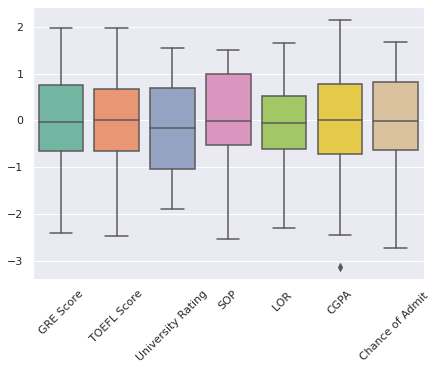

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

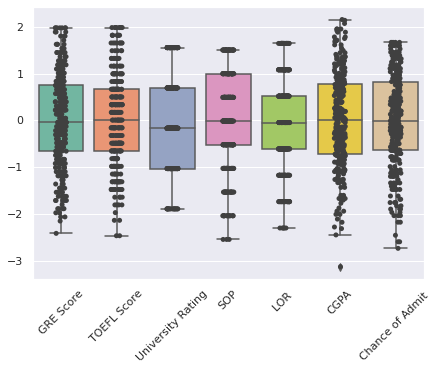

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

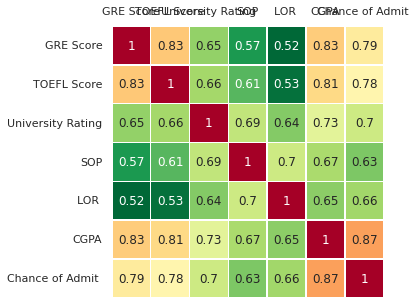

In [20]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [21]:
# pca = PCA(n_components=2)
# Retain 95% of useful features and create new dimensions
pca = PCA(0.95)
Z = pca.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of Z:", Z.shape)

Shape of X: (299, 7)
Shape of Z: (299, 5)


In [22]:
pca.n_components_

5

In [23]:
print(Z)

[[-3.48520848 -0.61293605 -0.38807198  0.37338681  0.15338288]
 [-1.19099165  0.72079142 -0.17390114 -0.30462226  0.1997884 ]
 [ 1.0373516   0.19964101 -0.15238143 -0.36119399  0.17920553]
 ...
 [ 0.29646001  0.23584931 -0.15025678 -0.04880101 -0.40251698]
 [-2.00466986 -0.27839031 -0.78187259  0.62588326  0.55459327]
 [-2.34024334 -0.12651042 -0.83888401  0.73992983 -0.07568595]]


Text(0, 0.5, '$Z_2$')

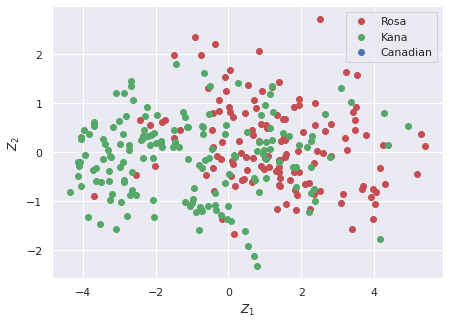

In [24]:
# 1(Rosa)-> 0,  2(Kama)-> 1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa, 0], Z[idx_Rosa, 1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana, 0], Z[idx_Kana, 1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian, 0], Z[idx_Canadian, 1], c='b', label='Canadian')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

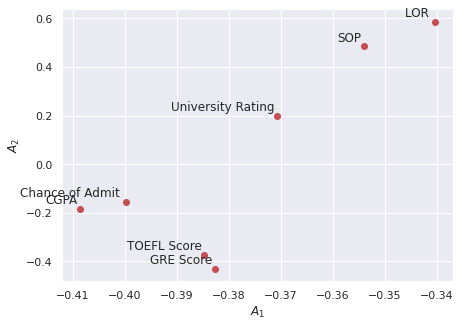

In [25]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [26]:
A

array([[-0.38270634, -0.43033862, -0.02683188,  0.11195631,  0.25288624],
       [-0.38483499, -0.37270245,  0.09397488,  0.26230671,  0.49794035],
       [-0.37080746,  0.19931532,  0.62816465, -0.64723203,  0.09146454],
       [-0.35407455,  0.48500037,  0.35245799,  0.66483235, -0.24359914],
       [-0.34035528,  0.58587593, -0.5914577 , -0.14253659,  0.40913582],
       [-0.40856526, -0.18377958, -0.1288841 , -0.03593786, -0.36591292],
       [-0.39975447, -0.15467405, -0.32434238, -0.19010894, -0.56490111]])

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


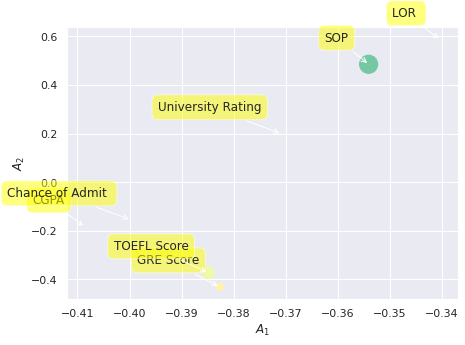

In [27]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

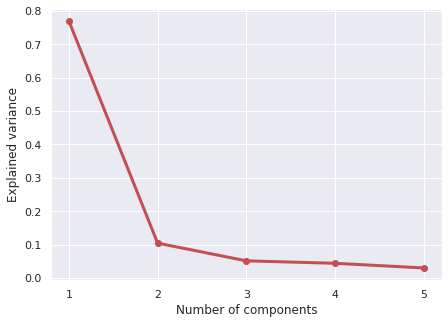

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

In [29]:
Lambda

array([5.18445307, 0.70295994, 0.34603911, 0.29653431, 0.20275877])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

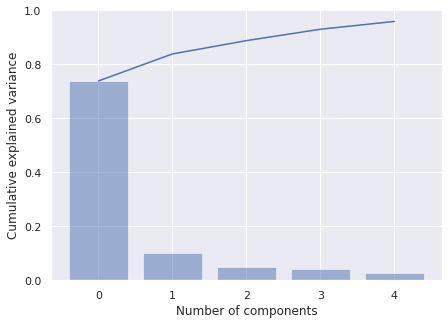

In [30]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

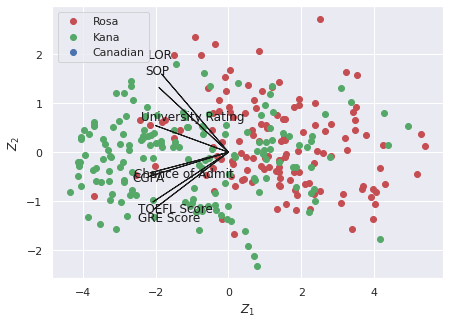

In [31]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [32]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=c795a2f13018cc0442160c01da99053e5985a58f67662705cf0b8a400438ad0a
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c9537ff99f69ed049aed0fc60ea7e14e4196ed3ba1977f78a3642dc4826d5126
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [34]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0   -3.485208 -0.612936 -0.388072  0.373387  0.153383
1   -1.190992  0.720791 -0.173901 -0.304622  0.199788
2    1.037352  0.199641 -0.152381 -0.361194  0.179206
3   -0.024428 -1.102218  0.442459  0.305511 -0.508610
4    2.085306 -0.643630 -0.613756 -0.378588  0.136198
..        ...       ...       ...       ...       ...
294  2.384310 -1.001465  0.260034  0.096931 -0.476611
295  1.676517 -0.556785 -0.125018  0.211120 -0.859290
296  0.296460  0.235849 -0.150257 -0.048801 -0.402517
297 -2.004670 -0.278390 -0.781873  0.625883  0.554593
298 -2.340243 -0.126510 -0.838884  0.739930 -0.075686

[299 rows x 5 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ff7a658b0>)

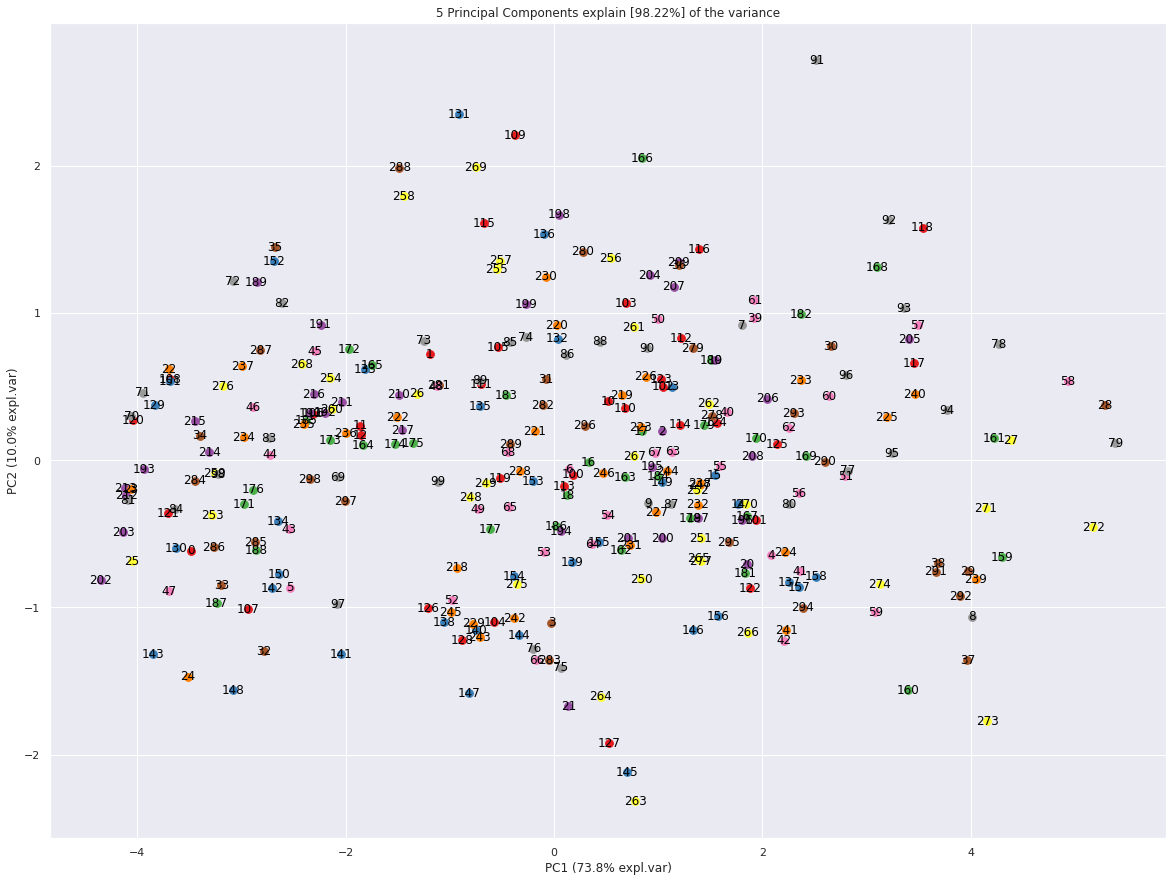

In [35]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [36]:
A = out['loadings'].T

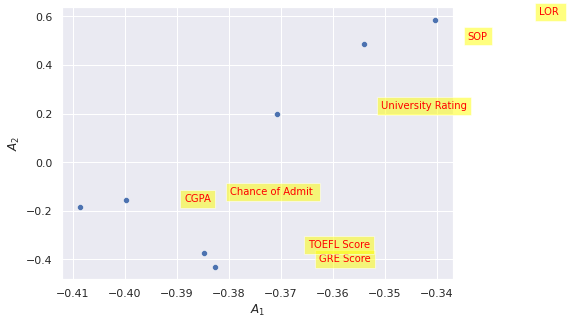

In [37]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

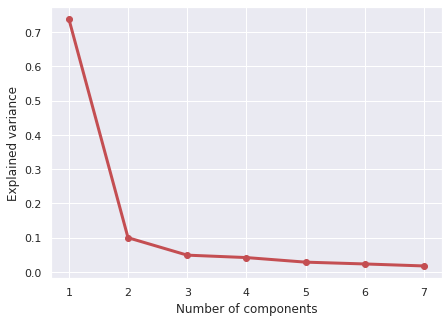

In [38]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

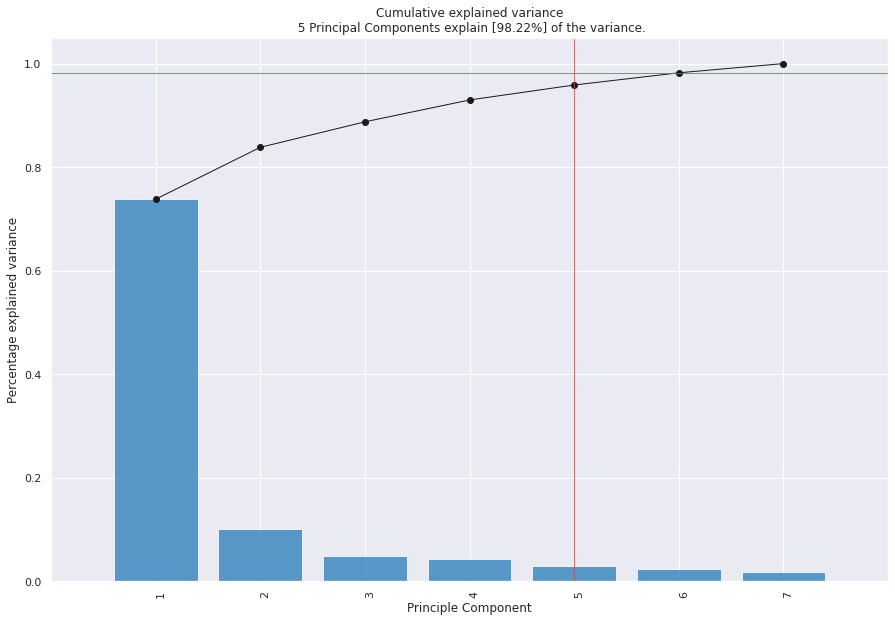

<Figure size 504x360 with 0 Axes>

In [39]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


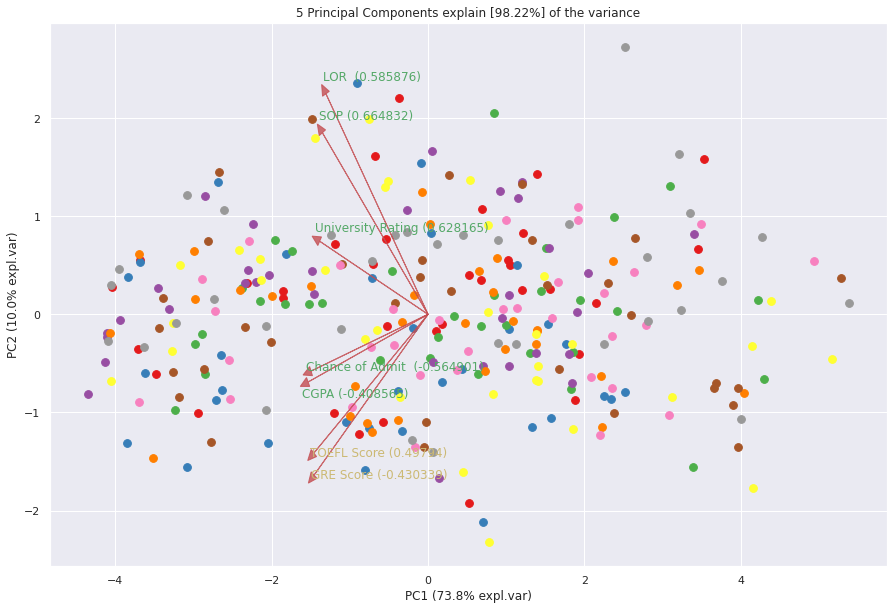

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ff8618f40>)

In [40]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


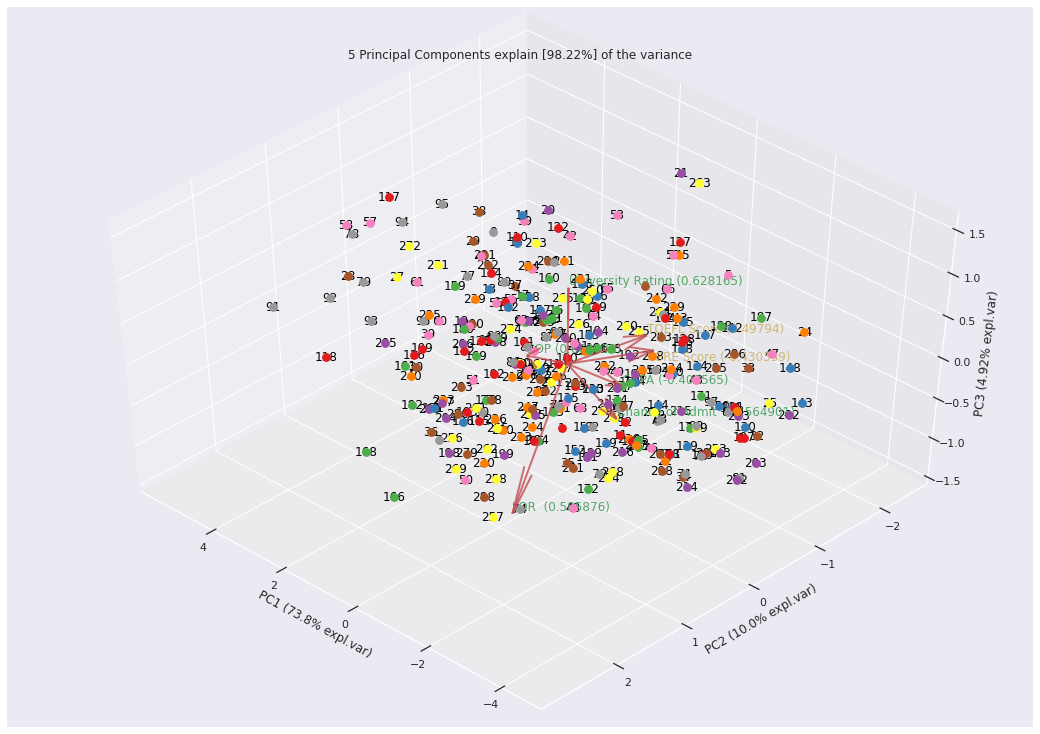

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f8fff39c580>)

In [41]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [42]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [43]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Sandeepungarala/INSE-6220-PROJECT/main/admission%201.csv')
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         337          118                  4  4.5   4.5  9.65   
1         324          107                  4  4.0   4.5  8.87   
2         316          104                  3  3.0   3.5  8.00   
3         322          110                  3  3.5   2.5  8.67   
4         314          103                  2  2.0   3.0  8.21   
5         330          115                  5  4.5   3.0  9.34   
6         321          109                  3  3.0   4.0  8.20   
7         308          101                  2  3.0   4.0  7.90   
8         302          102                  1  2.0   1.5  8.00   
9         323          108                  3  3.5   3.0  8.60   
10        325          106                  3  3.5   4.0  8.40   
11        327          111                  4  4.0   4.5  9.00   
12        328          112                  4  4.0   4.5  9.10   
13        307          109                  3  4.0   3.0  8.00   
14        311          104                  3  3.5   2.0  8.20   
15        314          105                  3  3.5   2.5  8.30   
16        317          107                  3  4.0   3.0  8.70   
17        319          106                  3  4.0   3.0  8.00   
18        318          110                  3  4.0   3.0  8.80   
19        303          102                  3  3.5   3.0  8.50   
20        312          107                  3  3.0   2.0  7.90   
21        325          114                  4  3.0   2.0  8.40   
22        328          116                  5  5.0   5.0  9.50   
23        334          119                  5  5.0   4.5  9.70   
24        336          119                  5  4.0   3.5  9.80   

    Chance of Admit   Class  
0               0.92      1  
1               0.76      1  
2               0.72      1  
3               0.80      1  
4               0.65      0  
5               0.90      1  
6               0.75      1  
7               0.68      0  
8               0.50      0  
9               0.45      0  
10              0.52      1  
11              0.84      1  
12              0.78      1  
13              0.62      1  
14              0.61      1  
15              0.54      0  
16              0.66      0  
17              0.65      1  
18              0.63      0  
19              0.62      0  
20              0.64      1  
21              0.70      0  
22              0.94      1  
23              0.95      1  
24              0.97      1

In [44]:
df["Class"].unique()
print(df.count())

GRE Score            299
TOEFL Score          299
University Rating    299
SOP                  299
LOR                  299
CGPA                 299
Chance of Admit      299
Class                299
dtype: int64


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [45]:
data = df.sample(frac=0.9, random_state=786)
print(data.count())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

GRE Score            269
TOEFL Score          269
University Rating    269
SOP                  269
LOR                  269
CGPA                 269
Chance of Admit      269
Class                269
dtype: int64
Data for Modeling: (269, 8)
Unseen Data For Predictions: (30, 8)


In [46]:
data_unseen

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         330          115                  5  4.5   3.0  9.34   
1         312          107                  3  3.0   2.0  7.90   
2         329          114                  5  4.0   5.0  9.30   
3         321          110                  3  3.5   5.0  8.85   
4         334          116                  4  4.0   3.0  8.00   
5         304          105                  2  3.0   3.0  8.20   
6         317          107                  2  3.5   3.0  8.28   
7         331          120                  3  4.0   4.0  8.96   
8         323          113                  3  4.0   4.0  8.88   
9         317          104                  2  4.5   4.0  8.47   
10        310          106                  4  1.5   2.5  8.36   
11        309          105                  5  3.5   3.5  8.56   
12        309          104                  2  2.0   2.5  8.26   
13        329          119                  4  4.5   4.5  9.16   
14        315          110                  2  3.5   3.0  8.46   
15        340          120                  5  4.5   4.5  9.91   
16        338          120                  4  5.0   5.0  9.66   
17        330          116                  5  5.0   4.5  9.36   
18        324          110                  4  3.0   3.5  8.97   
19        316          110                  3  3.5   4.0  8.56   
20        319          106                  3  3.5   2.5  8.33   
21        296          101                  1  2.5   3.0  7.68   
22        328          110                  4  4.0   2.5  9.02   
23        314          107                  3  3.0   3.5  8.17   
24        329          113                  5  5.0   4.5  9.45   
25        304          102                  2  3.0   4.0  8.73   
26        321          111                  3  2.5   3.0  8.90   
27        336          118                  5  4.5   4.0  9.19   
28        313          109                  3  4.0   3.5  9.00   
29        330          114                  3  4.5   4.5  9.24   

    Chance of Admit   Class  
0               0.90      1  
1               0.64      1  
2               0.86      1  
3               0.82      1  
4               0.78      1  
5               0.54      1  
6               0.66      0  
7               0.86      1  
8               0.79      1  
9               0.57      0  
10              0.57      0  
11              0.71      0  
12              0.65      0  
13              0.90      1  
14              0.72      1  
15              0.97      1  
16              0.95      1  
17              0.93      1  
18              0.84      1  
19              0.75      0  
20              0.74      1  
21              0.60      0  
22              0.81      1  
23              0.73      1  
24              0.89      1  
25              0.67      0  
26              0.80      1  
27              0.92      1  
28              0.79      0  
29              0.90      1

In [47]:
print(data_unseen.count())

GRE Score            30
TOEFL Score          30
University Rating    30
SOP                  30
LOR                  30
CGPA                 30
Chance of Admit      30
Class                30
dtype: int64


In [48]:
print(data.index)

RangeIndex(start=0, stop=269, step=1)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [50]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (269, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (188, 11)
12                    Transformed Test Set          (81, 11)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              79fc
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [51]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.6915  0.7598  0.7118  0.7179   
ridge                    Ridge Classifier    0.6810  0.0000  0.6918  0.7134   
knn                K Neighbors Classifier    0.6699  0.6817  0.6518  0.7182   
nb                            Naive Bayes    0.6652  0.7734  0.6618  0.7156   
lda          Linear Discriminant Analysis    0.6652  0.7623  0.6918  0.6950   
ada                  Ada Boost Classifier    0.6541  0.7325  0.6409  0.7052   
et                 Extra Trees Classifier    0.6500  0.7123  0.6418  0.6973   
lightgbm  Light Gradient Boosting Machine    0.6500  0.6640  0.6318  0.6950   
gbc          Gradient Boosting Classifier    0.6436  0.6805  0.6109  0.6826   
rf               Random Forest Classifier    0.6386  0.7046  0.6118  0.6913   
qda       Quadratic Discriminant Analysis    0.6336  0.6685  0.6300  0.6880   
dt               Decision Tree Classifier    0.5538  0.5492  0.5818  0.5855   
dummy                    Dummy Classifier    0.5374  0.5000  1.0000  0.5374   
svm                   SVM - Linear Kernel    0.5316  0.0000  0.4409  0.3369   

              F1   Kappa     MCC  TT (Sec)  
lr        0.7083  0.3757  0.3825     0.362  
ridge     0.6949  0.3553  0.3630     0.020  
knn       0.6703  0.3368  0.3491     0.014  
nb        0.6741  0.3261  0.3370     0.009  
lda       0.6853  0.3222  0.3306     0.009  
ada       0.6549  0.3065  0.3201     0.069  
et        0.6509  0.2976  0.3112     0.140  
lightgbm  0.6416  0.2975  0.3099     0.138  
gbc       0.6357  0.2866  0.2944     0.058  
rf        0.6346  0.2767  0.2882     0.164  
qda       0.6326  0.2573  0.2821     0.010  
dt        0.5785  0.0990  0.1010     0.009  
dummy     0.6989  0.0000  0.0000     0.009  
svm       0.3663  0.0660  0.0761     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [52]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Naive bayes ('nb')
* Ridge classifier ('ridge')
* Linear discriminant analysis ('lda')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Naive bayes classifier**

In [53]:
nb = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6842  0.8000  0.5000  0.8333  0.6250  0.3804  0.4177
1       0.6842  0.8000  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.5263  0.7833  0.8000  0.5333  0.6400  0.0229  0.0272
3       0.6316  0.7778  0.5000  0.7143  0.5882  0.2732  0.2875
4       0.6842  0.7111  0.8000  0.6667  0.7273  0.3596  0.3680
5       0.4737  0.5889  0.4000  0.5000  0.4444 -0.0440 -0.0449
6       0.8421  0.9222  0.8000  0.8889  0.8421  0.6851  0.6889
7       0.7368  0.8636  0.8182  0.7500  0.7826  0.4509  0.4536
8       0.7778  0.8875  0.8000  0.8000  0.8000  0.5500  0.5500
9       0.6111  0.6000  0.7000  0.6364  0.6667  0.2025  0.2039
Mean    0.6652  0.7734  0.6618  0.7156  0.6741  0.3261  0.3370
SD      0.1050  0.1062  0.1579  0.1243  0.1117  0.2118  0.2142

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


In [54]:
#trained model object is stored in the variable 'nb'. 
nb

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Naive bayes Model**

In [55]:
tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.7667  0.4000  0.6667  0.5000  0.1739  0.1910
1       0.7368  0.7667  0.6000  0.8571  0.7059  0.4809  0.5060
2       0.7368  0.8111  0.7000  0.7778  0.7368  0.4751  0.4778
3       0.7368  0.8222  0.7000  0.7778  0.7368  0.4751  0.4778
4       0.7368  0.7889  0.8000  0.7273  0.7619  0.4693  0.4719
5       0.6316  0.6000  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.8947  0.9667  0.9000  0.9000  0.9000  0.7889  0.7889
7       0.6842  0.8636  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.8333  0.9500  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.6111  0.5375  0.7000  0.6364  0.6667  0.2025  0.2039
Mean    0.7181  0.7873  0.7018  0.7568  0.7204  0.4327  0.4405
SD      0.0924  0.1283  0.1562  0.0804  0.1110  0.1847  0.1819

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GaussianNB(priors=None, var_smoothing=0.01)
INFO:logs:tune_model() succesfully completed......................................


In [56]:
#tuned model object is stored in the variable 'tuned_nb'. 
tuned_nb

GaussianNB(priors=None, var_smoothing=0.01)

**Evaluate Naive bayes Model**

Update statmodels

In [57]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [58]:
evaluate_model(tuned_nb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=0.01), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Ridge Model**

In [59]:
ridge = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.0  0.5000  0.6250  0.5556  0.1648  0.1685
1       0.7368  0.0  0.6000  0.8571  0.7059  0.4809  0.5060
2       0.6842  0.0  0.7000  0.7000  0.7000  0.3667  0.3667
3       0.6842  0.0  0.6000  0.7500  0.6667  0.3736  0.3820
4       0.7368  0.0  0.8000  0.7273  0.7619  0.4693  0.4719
5       0.6316  0.0  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.6842  0.0  0.8000  0.6667  0.7273  0.3596  0.3680
7       0.6842  0.0  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.8333  0.0  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.5556  0.0  0.7000  0.5833  0.6364  0.0769  0.0791
Mean    0.6810  0.0  0.6918  0.7134  0.6949  0.3553  0.3630
SD      0.0762  0.0  0.1316  0.0779  0.0837  0.1556  0.1572

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


**Tune Ridge Model**

In [60]:
tuned_ridge = tune_model(ridge)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.0  0.5000  0.6250  0.5556  0.1648  0.1685
1       0.6842  0.0  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.6842  0.0  0.7000  0.7000  0.7000  0.3667  0.3667
3       0.6842  0.0  0.6000  0.7500  0.6667  0.3736  0.3820
4       0.7368  0.0  0.8000  0.7273  0.7619  0.4693  0.4719
5       0.6316  0.0  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.7368  0.0  0.8000  0.7273  0.7619  0.4693  0.4719
7       0.6842  0.0  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.8333  0.0  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.5556  0.0  0.7000  0.5833  0.6364  0.0769  0.0791
Mean    0.6810  0.0  0.6818  0.7171  0.6903  0.3562  0.3646
SD      0.0762  0.0  0.1417  0.0723  0.0883  0.1549  0.1554

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Ridge Model**

In [61]:
evaluate_model(tuned_ridge)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Linear discriminant analysis Model**

In [62]:
lda = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.5778  0.5000  0.6250  0.5556  0.1648  0.1685
1       0.7368  0.8111  0.6000  0.8571  0.7059  0.4809  0.5060
2       0.5789  0.7778  0.6000  0.6000  0.6000  0.1556  0.1556
3       0.7368  0.8333  0.7000  0.7778  0.7368  0.4751  0.4778
4       0.6316  0.7778  0.8000  0.6154  0.6957  0.2486  0.2626
5       0.6316  0.6444  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.6842  0.8111  0.8000  0.6667  0.7273  0.3596  0.3680
7       0.6842  0.8523  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.8333  0.9375  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.5556  0.6000  0.7000  0.5833  0.6364  0.0769  0.0791
Mean    0.6652  0.7623  0.6918  0.6950  0.6853  0.3222  0.3306
SD      0.0827  0.1111  0.1316  0.0907  0.0864  0.1684  0.1705

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune Linear discriminant analysis Model**

In [63]:
tuned_lda = tune_model(lda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.6444  0.4000  0.6667  0.5000  0.1739  0.1910
1       0.7368  0.8222  0.6000  0.8571  0.7059  0.4809  0.5060
2       0.7368  0.8222  0.7000  0.7778  0.7368  0.4751  0.4778
3       0.7895  0.8333  0.7000  0.8750  0.7778  0.5824  0.5955
4       0.6842  0.8222  0.8000  0.6667  0.7273  0.3596  0.3680
5       0.6316  0.6111  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.9474  0.9667  1.0000  0.9091  0.9524  0.8939  0.8989
7       0.6842  0.8523  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.7778  0.9000  0.9000  0.7500  0.8182  0.5385  0.5534
9       0.6111  0.5625  0.6000  0.6667  0.6316  0.2222  0.2236
Mean    0.7178  0.7837  0.7018  0.7576  0.7188  0.4329  0.4440
SD      0.1012  0.1252  0.1743  0.0883  0.1192  0.2008  0.2002

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Linear discriminant analysis Model**

In [64]:
evaluate_model(tuned_lda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [65]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5263  0.5167  0.3000  0.6000  0.4000  0.0757  0.0882
1       0.6842  0.6778  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.5789  0.6722  0.6000  0.6000  0.6000  0.1556  0.1556
3       0.6842  0.8222  0.6000  0.7500  0.6667  0.3736  0.3820
4       0.6842  0.8222  0.8000  0.6667  0.7273  0.3596  0.3680
5       0.5789  0.5556  0.4000  0.6667  0.5000  0.1739  0.1910
6       0.5789  0.7222  0.8000  0.5714  0.6667  0.1364  0.1512
7       0.7368  0.8068  0.8182  0.7500  0.7826  0.4509  0.4536
8       0.7778  0.8500  0.7000  0.8750  0.7778  0.5610  0.5750
9       0.5556  0.6000  0.6000  0.6000  0.6000  0.1000  0.1000
Mean    0.6386  0.7046  0.6118  0.6913  0.6346  0.2767  0.2882
SD      0.0809  0.1139  0.1662  0.1007  0.1134  0.1596  0.1621

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [66]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.6444  0.5000  0.7143  0.5882  0.2732  0.2875
1       0.6842  0.6889  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.6842  0.7833  0.7000  0.7000  0.7000  0.3667  0.3667
3       0.8421  0.8222  0.9000  0.8182  0.8571  0.6816  0.6854
4       0.6842  0.7833  0.8000  0.6667  0.7273  0.3596  0.3680
5       0.6316  0.6556  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.8947  0.9000  0.8000  1.0000  0.8889  0.7912  0.8090
7       0.7895  0.8295  0.8182  0.8182  0.8182  0.5682  0.5682
8       0.8333  0.8500  0.7000  1.0000  0.8235  0.6747  0.7135
9       0.6667  0.5875  0.7000  0.7000  0.7000  0.3250  0.3250
Mean    0.7342  0.7545  0.6918  0.7965  0.7316  0.4694  0.4829
SD      0.0913  0.0981  0.1390  0.1158  0.1053  0.1813  0.1844

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [67]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [68]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.6778  0.4000  0.6667  0.5000  0.1739  0.1910
1       0.7368  0.7889  0.6000  0.8571  0.7059  0.4809  0.5060
2       0.7368  0.8444  0.7000  0.7778  0.7368  0.4751  0.4778
3       0.6842  0.8000  0.6000  0.7500  0.6667  0.3736  0.3820
4       0.7368  0.7667  0.8000  0.7273  0.7619  0.4693  0.4719
5       0.6316  0.6000  0.5000  0.7143  0.5882  0.2732  0.2875
6       0.8947  0.9667  0.9000  0.9000  0.9000  0.7889  0.7889
7       0.6842  0.8636  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.8333  0.9125  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.6667  0.5750  0.7000  0.7000  0.7000  0.3250  0.3250
Mean    0.7184  0.7796  0.6918  0.7604  0.7167  0.4348  0.4431
SD      0.0879  0.1221  0.1592  0.0727  0.1110  0.1736  0.1704

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [69]:
tuned_best_model

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [70]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [72]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (269, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 3)
12                    Transformed Test Set           (81, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2e49
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

In [73]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.7126  0.7631  0.6918  0.7723   
ridge                    Ridge Classifier    0.7076  0.0000  0.7118  0.7354   
lda          Linear Discriminant Analysis    0.7076  0.7767  0.7118  0.7354   
qda       Quadratic Discriminant Analysis    0.7073  0.7719  0.7218  0.7348   
lr                    Logistic Regression    0.7020  0.7767  0.7118  0.7286   
rf               Random Forest Classifier    0.6921  0.6995  0.6618  0.7454   
gbc          Gradient Boosting Classifier    0.6865  0.7022  0.6827  0.7328   
knn                K Neighbors Classifier    0.6655  0.7206  0.6618  0.6974   
lightgbm  Light Gradient Boosting Machine    0.6596  0.6833  0.6427  0.7018   
ada                  Ada Boost Classifier    0.6442  0.7102  0.6627  0.6800   
et                 Extra Trees Classifier    0.6392  0.6846  0.6218  0.6752   
dt               Decision Tree Classifier    0.6333  0.6240  0.7036  0.6549   
dummy                    Dummy Classifier    0.5374  0.5000  1.0000  0.5374   
svm                   SVM - Linear Kernel    0.5292  0.0000  0.5755  0.5830   

              F1   Kappa     MCC  TT (Sec)  
nb        0.7152  0.4213  0.4363     0.009  
ridge     0.7165  0.4103  0.4168     0.008  
lda       0.7165  0.4103  0.4168     0.010  
qda       0.7188  0.4084  0.4170     0.011  
lr        0.7126  0.3983  0.4059     0.011  
rf        0.6889  0.3796  0.3929     0.169  
gbc       0.6975  0.3659  0.3765     0.055  
knn       0.6732  0.3265  0.3319     0.016  
lightgbm  0.6641  0.3152  0.3210     0.020  
ada       0.6622  0.2775  0.2801     0.073  
et        0.6409  0.2758  0.2819     0.144  
dt        0.6704  0.2501  0.2611     0.010  
dummy     0.6989  0.0000  0.0000     0.009  
svm       0.5733  0.0451  0.0407     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


In [74]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [75]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6842  0.6222  0.4000  1.0000  0.5714  0.3871  0.4899
1       0.7368  0.7556  0.7000  0.7778  0.7368  0.4751  0.4778
2       0.7895  0.8333  0.7000  0.8750  0.7778  0.5824  0.5955
3       0.6842  0.8333  0.6000  0.7500  0.6667  0.3736  0.3820
4       0.6842  0.7778  0.8000  0.6667  0.7273  0.3596  0.3680
5       0.5789  0.6000  0.5000  0.6250  0.5556  0.1648  0.1685
6       0.8947  0.9556  0.9000  0.9000  0.9000  0.7889  0.7889
7       0.6842  0.8409  0.8182  0.6923  0.7500  0.3294  0.3380
8       0.7778  0.8500  0.8000  0.8000  0.8000  0.5500  0.5500
9       0.6111  0.5625  0.7000  0.6364  0.6667  0.2025  0.2039
Mean    0.7126  0.7631  0.6918  0.7723  0.7152  0.4213  0.4363
SD      0.0868  0.1214  0.1460  0.1174  0.0990  0.1760  0.1761

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


In [76]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=2e-09)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [77]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [78]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import shap

In [80]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.6778  0.4000  0.6667  0.5000  0.1739  0.1910
1       0.6842  0.6278  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.6842  0.8333  0.6000  0.7500  0.6667  0.3736  0.3820
3       0.6316  0.5556  0.5000  0.7143  0.5882  0.2732  0.2875
4       0.7368  0.6833  0.8000  0.7273  0.7619  0.4693  0.4719
5       0.7368  0.7000  0.6000  0.8571  0.7059  0.4809  0.5060
6       0.7368  0.7278  0.7000  0.7778  0.7368  0.4751  0.4778
7       0.6316  0.6648  0.8182  0.6429  0.7200  0.2036  0.2166
8       0.8333  0.9562  0.9000  0.8182  0.8571  0.6582  0.6625
9       0.6667  0.5688  0.8000  0.6667  0.7273  0.3077  0.3162
Mean    0.6921  0.6995  0.6618  0.7454  0.6889  0.3796  0.3929
SD      0.0684  0.1138  0.1579  0.0713  0.0944  0.1396  0.1373

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [81]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7368  0.7500  0.5000  1.0000  0.6667  0.4865  0.5669
1       0.6842  0.6778  0.5000  0.8333  0.6250  0.3804  0.4177
2       0.7895  0.8500  0.6000  1.0000  0.7500  0.5870  0.6445
3       0.6316  0.6389  0.5000  0.7143  0.5882  0.2732  0.2875
4       0.7895  0.7944  0.8000  0.8000  0.8000  0.5778  0.5778
5       0.6316  0.5500  0.4000  0.8000  0.5333  0.2811  0.3276
6       0.8421  0.9000  0.7000  1.0000  0.8235  0.6885  0.7246
7       0.7895  0.8466  0.8182  0.8182  0.8182  0.5682  0.5682
8       0.8889  0.8750  0.8000  1.0000  0.8889  0.7805  0.8000
9       0.5556  0.5688  0.6000  0.6000  0.6000  0.1000  0.1000
Mean    0.7339  0.7451  0.6218  0.8566  0.7094  0.4723  0.5015
SD      0.1001  0.1223  0.1424  0.1330  0.1156  0.1997  0.2045

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


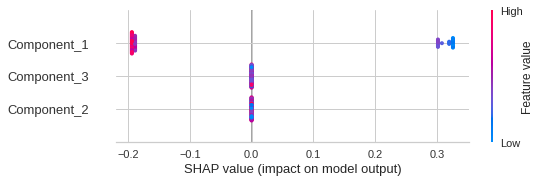

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [82]:
interpret_model(tuned_rf_pca, plot='summary')

In [83]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [84]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [85]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
